## Exercise B.2 -- Electrochemical Potential of Anthraquinone Derivatives

In this exercise we compare experimentally measured electrochemical potentials of anthraquinone (AQ) derivatives with those calculated using theoretical methods.
We want to find out how well the calculation can reproduce the experimental data.

[Anthraquinone](https://en.wikipedia.org/wiki/Anthraquinone) is an aromatic organic molecule, with manifold applications.
In nature, AQ and its derivatives are found in plants and microorganisms due to its key role in reversible redox reactions.
For this reason AQ derivates are also key components in industrial processes and material development (such as battery research at the University of Innsbruck).

The data for this exercise is taken from a recent collaboration between the Theoretical Chemistry Department and the Institute for Physical chemistry.
([Phys.Chem.Chem.Phys. 2022, **24**, *16207 -- 16219*](https://pubs.rsc.org/en/content/articlehtml/2022/cp/d2cp01717b)\ )

Let's start by loading the data files, but wait...

In [7]:
path = "/Users/stk/dev/PythonForChemists_public/course/data/exercises/exercises3/"

Next, we read the data from the files. Because our files contain text and numbers, we have to read the data as *object*.





In [14]:
import numpy as np

experim = np.loadtxt('/Users/stk/dev/PythonForChemists_public/course/data/exercises/exercises3/experimental.dat', dtype=object)


ValueError: the number of columns changed from 3 to 2 at row 8; use `usecols` to select a subset and avoid this error

In [15]:
theory = np.loadtxt('/Users/stk/dev/PythonForChemists_public/course/data/exercises/exercises3/theory.dat', dtype=object)

It is a good idea to have a look at the data files before starting to analyze:

In [3]:
print("Contents of array experiment:")
print(experim)

print("\nContents of array theory:")
print(theory)

Contents of array experiment:
[['1-OH' '-530.0' '-1178.5']
 ['2-OH' '-707.5' '-1139.8']
 ['1,2-OH' '-542.9' '-1125.5']
 ['1,4-OH' '-423.9' '-1066.4']
 ['1,5-OH' '-369.1' '-893.5']
 ['1,8-OH' '-396.4' '-1107.0']
 ['1-NH2' '-816.4' '-1516.9']
 ['1,2-NH2' '-950.6' '-1551.2']
 ['1,4-NH2' '-983.4' '-1541.8']
 ['2,6-NH2' '-1086.0' '-1652.3']
 ['1-NH2-4-OH' '-710.4' '-1328.9']]

Contents of array theory:
[['1-OH' '-528.1' '-1196.9']
 ['2-OH' '-718.8' '-1474.4']
 ['1,2-OH' '-554.3' '-1177.9']
 ['1,4-OH' '-466.0' '-1135.9']
 ['1,5-OH' '-387.9' '-1032.8']
 ['1,8-OH' '-436.5' '-1129.6']
 ['1-NH2' '-796.4' '-1494.4']
 ['1,2-NH2' '-945.0' '-1601.9']
 ['1,4-NH2' '-1010.4' '-1616.2']
 ['2,6-NH2' '-1006.3' '-1696.3']
 ['1-OH-4-NH2' '-728.8' '-1369.2']]


The data looks fine. The contents are:

- First column  : ID of the AQ derivatives

- Second column : First reduction potential in mV

- Third column  : Total (first plus second) recuction potential in mV

It is a good idea to extract the data column-wise, but we have to tell python that the entries are numbers and not words. Numbers with a comma are called *float* (for floating point number), which are different from numbers without a comma referred to as *int* (meaning integer).

Thankfully, the data sets are already properly sorted! (... you're welcome :D)

Also, it is a good idea to convert the data from mV to V.


In [4]:
# Names are read as 'words', which in computer-lingo are called strings
ID = experim[:, 0]

# The data have to be transformed into numbers
# In this case are floating points numbers (float)
# Divide by 1000 to convert from mV to V
redox1_exp = experim[:,1].astype(float)/1000
redox2_exp = experim[:,2].astype(float)/1000

redox1_theo = theory[:,1].astype(float)/1000
redox2_theo = theory[:,2].astype(float)/1000

For the regression we need to pair the correct data columns.

We use the theoretical data on the x-axis and the experimental values on the y-axis.

In the best-case scenario we end up with a linear regression having:

- A slope of exactly 1.0
- An intercept of 0.0
- An R$^2$-value of 1.0

We already have established that [SciPy](https://scipy.org/) provides the easiest method.

Just don't forget to calculate the square of the $R$-value.

Let's go :D


In [5]:
from scipy.stats import linregress

reg_redox_1 = linregress(redox1_theo, redox1_exp)
reg_redox_2 = linregress(redox2_theo, redox2_exp)

print(f"First redox potential - slope         : {reg_redox_1[0]: 7.4f}")
print(f"First redox potential - intercept     : {reg_redox_1[1]: 7.3f} V")
print(f"First redox potential - R²            : {reg_redox_1[2]**2: 7.4f}\n")

print(f"Second redox potential - slope         : {reg_redox_2[0]: 7.4f}")
print(f"Second redox potential - intercept     : {reg_redox_2[1]: 7.3f} V")
print(f"Second redox potential - R²            : {reg_redox_2[2]**2: 7.4f}\n")

First redox potential - slope         :  1.0856
First redox potential - intercept     :   0.065 V
First redox potential - R²            :  0.9880

Second redox potential - slope         :  0.9899
Second redox potential - intercept     :   0.061 V
Second redox potential - R²            :  0.8540



Somehow, the R$^2$ value of the second redox potential doesn't look too good.

Better make a plot to see what is going on.

<u> BUT:</u>  When drawing correlation plots it is a good idea to make them appear as <u> PERFECT SQUARES</u> .

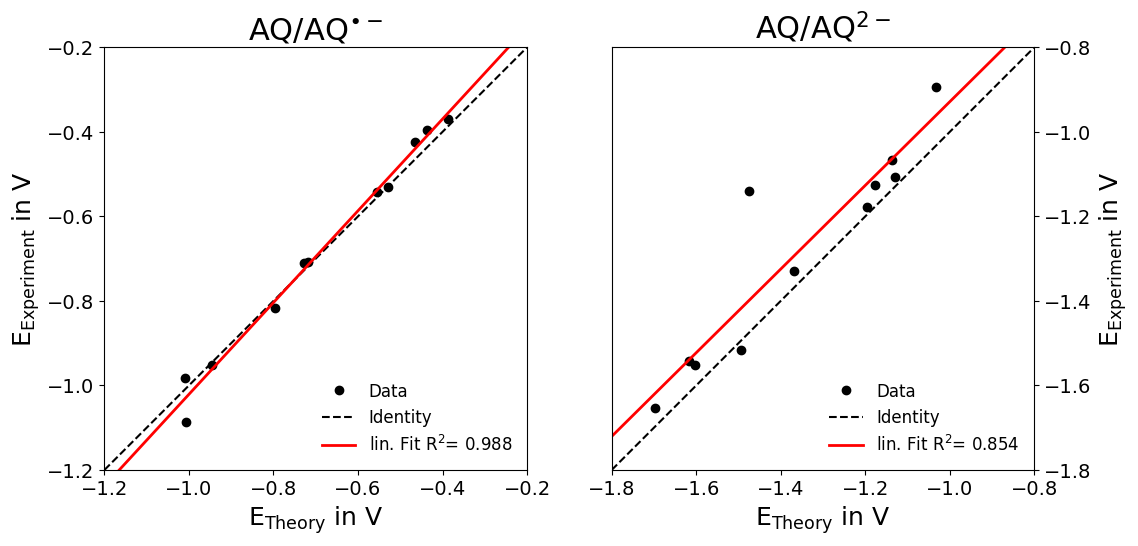

In [6]:
import matplotlib.pyplot as plt

# Set up the subplot -- one row, two columns
# This time we need to store the axes information
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))
# Draw the ideal diagonal over the whole range.
# Suitable x- and y-ranges depend on the data and this
# usually requires some work ...
ax1.set_xlim(-1.2,-0.2)
ax1.set_ylim(-1.2,-0.2)

ax2.set_xlim(-1.8,-0.8)
ax2.set_ylim(-1.8,-0.8)

# Set the aspect ratio of the axes to 1 for each subplot (perfect square)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

# Define an x-range with only 2 points (start- and endpoint)
# along the plot
x1=np.linspace(-1.2, -0.2, 2)
x2=np.linspace(-1.8, -0.8, 2)

ax1.plot(redox1_theo, redox1_exp, marker = 'o', color = 'k', linestyle = ' ', label = 'Data')
ax1.plot([-1.2, -0.2], [-1.2, -0.2], color = 'k', linestyle = '--', label = "Identity")
ax1.plot(x1, reg_redox_1[0]*x1+reg_redox_1[1], color = 'r', linewidth=2, label = f"lin. Fit R$^2$={reg_redox_1[2]**2: 6.3f}")

ax2.plot(redox2_theo, redox2_exp, marker = 'o', color = 'k', linestyle = ' ', label = 'Data')
ax2.plot([-1.8, -0.8], [-1.8, -0.8], color = 'k', linestyle = '--', label = "Identity")
ax2.plot(x2, reg_redox_2[0]*x2+reg_redox_2[1], color = 'r', linewidth=2, label = f"lin. Fit R$^2$={reg_redox_2[2]**2: 6.3f}")

# Set labels and fontsizes
ax1.set_xlabel(fr'E$_\text{{Theory}}$ in V', fontsize=18)
ax1.set_ylabel(fr'E$_\text{{Experiment}}$ in V', fontsize=18)
ax1.set_title(fr'AQ/AQ$^{{\bullet -}}$', fontsize=22)

ax2.set_xlabel(fr'E$_\text{{Theory}}$ in V', fontsize=18)
ax2.set_ylabel(fr'E$_\text{{Experiment}}$ in V', fontsize=18)
ax2.set_title(fr'AQ/AQ$^{{2 -}}$', fontsize=22)

# Place the ticks and labels of the y-axis on the right
# side of the plot
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

ax1.legend(loc='lower right', frameon = False, fontsize = 12)
ax2.legend(loc='lower right', frameon = False, fontsize = 12)

plt.show()

There is a clear outlier, but how to find it?

- The outlier surely has the largest deviation (=*residual r*) to the regression curve.

$$ r_i = y_I - \bar{y}_i $$

- A simple framework to detect outliers are z-scores. For a normal data set, they are computed as:

$$ z_i = \frac{ y_i - y_\mathrm{av} } { \sigma_{y} } $$

- <u> BUT:</u>  In case of a linear regression, the z-score has to be determined for the residuals $r_i$ and not for the data points along the y-axis!!

$$ z_i = \frac{r_i - \Delta r_\mathrm{av} } { \sigma_{\Delta r} } $$

- <u> CAREFUL:</u>  Most online tutorials and AI systems will give you
   the WRONG advice in the is context, namely to   
   calculate the z-score of the y-axis only.



In [7]:
# Manual method
y_pred = reg_redox_2[0] * redox2_theo + reg_redox_2[1]
residuals = redox2_exp - y_pred

z_scores = (residuals - np.mean(residuals)) / np.std(residuals)

print("------------------------------------------------------------")
print(f'idx  Compound        ΔE          z-score')
print("------------------------------------------------------------")
for i in np.arange(0,len(redox2_exp)):
  print(f'{i:3d}  {ID[i]:10s}  {residuals[i]:8.4f} V    {z_scores[i]:8.4f}    {"OUTLIER" if abs(z_scores[i]) > 2 else ""}')
print("------------------------------------------------------------")

------------------------------------------------------------
idx  Compound        ΔE          z-score
------------------------------------------------------------
  0  1-OH         -0.0549 V     -0.6059    
  1  2-OH          0.2585 V      2.8546    OUTLIER
  2  1,2-OH       -0.0207 V     -0.2283    
  3  1,4-OH       -0.0032 V     -0.0348    
  4  1,5-OH        0.0677 V      0.7473    
  5  1,8-OH       -0.0500 V     -0.5520    
  6  1-NH2        -0.0988 V     -1.0906    
  7  1,2-NH2      -0.0267 V     -0.2943    
  8  1,4-NH2      -0.0031 V     -0.0342    
  9  2,6-NH2      -0.0343 V     -0.3788    
 10  1-NH2-4-OH   -0.0347 V     -0.3832    
------------------------------------------------------------


There is also a scipy module to do this automatically.


<u>Careful:</u> In case of a linear regression, the z-score has to be determined for the residuals and not for the data points along the y-axis!!

Most online tutorials and AI systems will give you the <u>WRONG</u> advice in the is context, namely to calculate the z-score of the y-axis only:


```
z_score = z_score(y) # Wrong in case of linear regression!!
```




In [8]:
from scipy.stats import zscore

z_scores_scipy = zscore(residuals)


print("------------------------------------------------------------")
print(f'idx  Compound        ΔE          z-score')
print("------------------------------------------------------------")
for i in np.arange(0,len(redox2_exp)):
  print(f'{i:3d}  {ID[i]:10s}  {residuals[i]:8.4f} V    {z_scores_scipy[i]:8.4f}    {"OUTLIER" if abs(z_scores_scipy[i]) > 2 else ""}')
print("------------------------------------------------------------")

------------------------------------------------------------
idx  Compound        ΔE          z-score
------------------------------------------------------------
  0  1-OH         -0.0549 V     -0.6059    
  1  2-OH          0.2585 V      2.8546    OUTLIER
  2  1,2-OH       -0.0207 V     -0.2283    
  3  1,4-OH       -0.0032 V     -0.0348    
  4  1,5-OH        0.0677 V      0.7473    
  5  1,8-OH       -0.0500 V     -0.5520    
  6  1-NH2        -0.0988 V     -1.0906    
  7  1,2-NH2      -0.0267 V     -0.2943    
  8  1,4-NH2      -0.0031 V     -0.0342    
  9  2,6-NH2      -0.0343 V     -0.3788    
 10  1-NH2-4-OH   -0.0347 V     -0.3832    
------------------------------------------------------------


Data point 1 (2-hydroxy anthraquionone, 2-OH) seems to be the problem:

- highest absolute residual of 0.2585 V
- z-score close to 3

Let's repeat the regression for plots 2, but exclude data point 1.

In [10]:
redox2_theo_filtered = np.delete(redox2_theo,1)
redox2_exp_filtered = np.delete(redox2_exp,1)

reg_redox_2_filtered = linregress(redox2_theo_filtered, redox2_exp_filtered)

print(f"Second redox potential - slope         : {reg_redox_2_filtered[0]: 7.4f}")
print(f"Second redox potential - intercept     : {reg_redox_2_filtered[1]: 7.3f} V")
print(f"Second redox potential - R²            : {reg_redox_2_filtered[2]**2: 7.4f}\n")


Second redox potential - slope         :  1.0538
Second redox potential - intercept     :   0.121 V
Second redox potential - R²            :  0.9755



Now that's more like it.

Let's recreate the plot without the outlier.

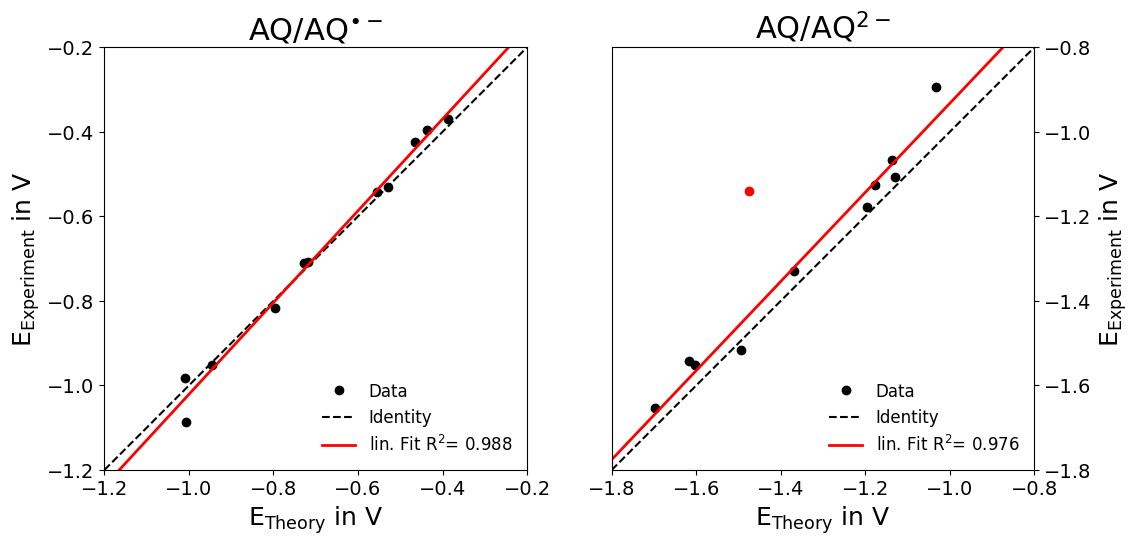

In [ ]:
# Set up the subplot -- one row, two columns
# This time we need to store the axes information
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))

# Suitable x- and y-ranges depend on the data and this
# usually requires some work ...
ax1.set_xlim(-1.2,-0.2)
ax1.set_ylim(-1.2,-0.2)

ax2.set_xlim(-1.8,-0.8)
ax2.set_ylim(-1.8,-0.8)

# Set the aspect ratio of the axes to 1 for each subplot (perfect square)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

# Define an x-range with only 2 points (start- and endpoint)
# along the plot
x1=np.linspace(-1.2, -0.2, 2)
x2=np.linspace(-1.8, -0.8, 2)

ax1.plot(redox1_theo, redox1_exp, marker = 'o', color = 'k', linestyle = ' ', label = 'Data')
ax1.plot([-1.2, -0.2], [-1.2, -0.2], color = 'k', linestyle = '--', label = "Identity")
ax1.plot(x1, reg_redox_1[0]*x1+reg_redox_1[1], color = 'r', linewidth=2, label = f"lin. Fit R$^2$={reg_redox_1[2]**2: 6.3f}")

ax2.plot(redox2_theo_filtered, redox2_exp_filtered, marker = 'o', color = 'k', linestyle = ' ', label = 'Data')
ax2.plot(redox2_theo[1], redox2_exp[1], marker = 'o', color = 'r', linestyle = ' ')
ax2.plot([-1.8, -0.8], [-1.8, -0.8], color = 'k', linestyle = '--', label = "Identity")
ax2.plot(x2, reg_redox_2_filtered[0]*x2+reg_redox_2_filtered[1], color = 'r', linewidth=2, label = f"lin. Fit R$^2$={reg_redox_2_filtered[2]**2: 6.3f}")


# Set labels and fontsizes
ax1.set_xlabel(fr'E$_\text{{Theory}}$ in V', fontsize=18)
ax1.set_ylabel(fr'E$_\text{{Experiment}}$ in V', fontsize=18)
ax1.set_title(fr'AQ/AQ$^{{\bullet -}}$', fontsize=22)

ax2.set_xlabel(fr'E$_\text{{Theory}}$ in V', fontsize=18)
ax2.set_ylabel(fr'E$_\text{{Experiment}}$ in V', fontsize=18)
ax2.set_title(fr'AQ/AQ$^{{2 -}}$', fontsize=22)

ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

ax1.legend(loc='lower right', frameon = False, fontsize = 12)
ax2.legend(loc='lower right', frameon = False, fontsize = 12)

plt.show()